<a href="https://colab.research.google.com/github/Romelianism/Quantum-Resizable-Addition-and-Multiplication/blob/main/Quantum_Resizable_Addition_and_Multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 6.5 MB 7.7 MB/s 
     |████████████████████████████████| 18.0 MB 241 kB/s 
     |████████████████████████████████| 240 kB 47.0 MB/s 
     |████████████████████████████████| 200 kB 51.7 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 112 kB 68.7 MB/s 
     |████████████████████████████████| 1.6 MB 44.5 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 943 kB 48.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 37.5 MB 15 kB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 4.0 MB 47.7 MB/s 
     |████████████████████████████████| 112 kB 60.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.1-py3-none-any.whl size=11887 sha256=b0f7465ea2d3c742f2b37c2db6d58ba2a5c0c41e50e3bb0d0b57ae93f68a9150
  Stored in directory: /root/.cache/pip/wheel

In [2]:
from qiskit import transpile, QuantumCircuit
import qiskit.quantum_info as qi

from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error

from qiskit.tools.visualization import plot_histogram

import numpy as np

In [3]:
# CNOT matrix operator with qubit-0 as control and qubit-1 as target
cx_op = qi.Operator([[1, 0, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0],
                     [0, 1, 0, 0]])

# iSWAP matrix operator
iswap_op = qi.Operator([[1, 0, 0, 0],
                        [0, 0, 1j, 0],
                        [0, 1j, 0, 0],
                        [0, 0, 0, 1]])

xor_op = qi.Operator([[1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0, 0, 1, 0],
                      [0, 0, 0, 1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 1, 0, 0, 0],
                      [0, 1, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 1]])

or_op = qi.Operator([[1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0, 0, 1, 0],
                      [0, 0, 0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 1, 0, 0, 0],
                      [0, 1, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0, 0, 0],
                      [0, 0, 0, 1, 0, 0, 0, 0]])

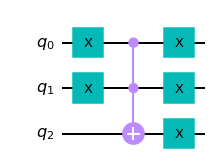

In [4]:
OR_circ = QuantumCircuit(3, name='OR')
OR_circ.x(0)
OR_circ.x(1)
OR_circ.ccx(0,1,2)
OR_circ.x(0)
OR_circ.x(1)
OR_circ.x(2)
OR_circ.draw(output='mpl')

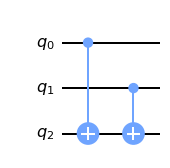

In [5]:
XOR_circ = QuantumCircuit(3, name='XOR')
XOR_circ.cx(0,2)
XOR_circ.cx(1,2)
XOR_circ.draw(output='mpl')

In [6]:
support_unitary = 'unitary' in AerSimulator().configuration().basis_gates
print(support_unitary)
print(AerSimulator().configuration().basis_gates)
assert support_unitary

True
['ccx', 'cp', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'h', 'id', 'initialize', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'roerror', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_clifford', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix', 'set_matrix_product_state', 'set_stabilizer', 'set_statevector', 'set_superop', 'set_unitary', 'snapshot', 'superop']


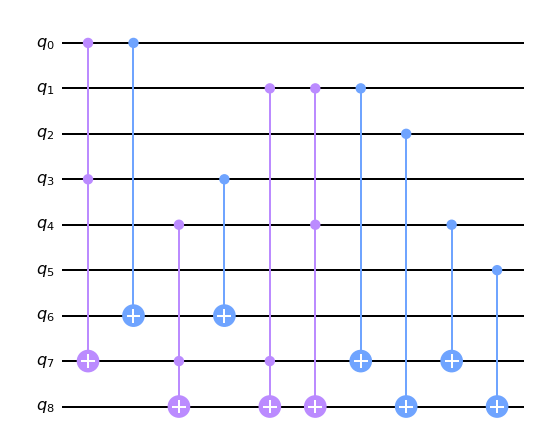

In [7]:
def create_QAddition(input_bit_size, extend_end = False):
  Add_circ = QuantumCircuit(input_bit_size * 3 + extend_end, name='Add')

  if input_bit_size+extend_end > 1:
    Add_circ.ccx(0,input_bit_size, input_bit_size*2+1)

  Add_circ.cx(0, input_bit_size*2)
  Add_circ.cx(input_bit_size, input_bit_size*2)

  for i in range(1,input_bit_size):
    if i < input_bit_size - 1 or extend_end == True:
      Add_circ.ccx(i+input_bit_size, i+input_bit_size*2, i+input_bit_size*2+1)
      Add_circ.ccx(i, i+input_bit_size*2, i+input_bit_size*2+1)
      Add_circ.ccx(i, i+input_bit_size, i+input_bit_size*2+1)
    Add_circ.cx(i, i+input_bit_size*2)
    Add_circ.cx(i+input_bit_size, i+input_bit_size*2)
  return Add_circ

create_QAddition(3).draw(output='mpl')

In [8]:
def cnx(self, *qubits):
    if len(qubits) > 3:
        last = qubits[-1]
        # A matrix: (made up of a  and Y rotation, lemma4.3)
        self.crz(np.pi/2, qubits[-2], qubits[-1])
        self.cu3(np.pi/2, 0, 0, qubits[-2],qubits[-1])
        
        # Control not gate
        cnx(self,*qubits[:-2],qubits[-1])
        
        # B matrix (pposite angle)
        self.cu3(-np.pi/2, 0, 0, qubits[-2], qubits[-1])
        
        # Control
        cnx(self,*qubits[:-2],qubits[-1])
        
        # C matrix (final rotation)
        self.crz(-np.pi/2,qubits[-2],qubits[-1])
    elif len(qubits)==3:
        self.ccx(*qubits)
    elif len(qubits)==2:
        self.cx(*qubits)
QuantumCircuit.cnx = cnx

0
0
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  if sys.path[0] == '':


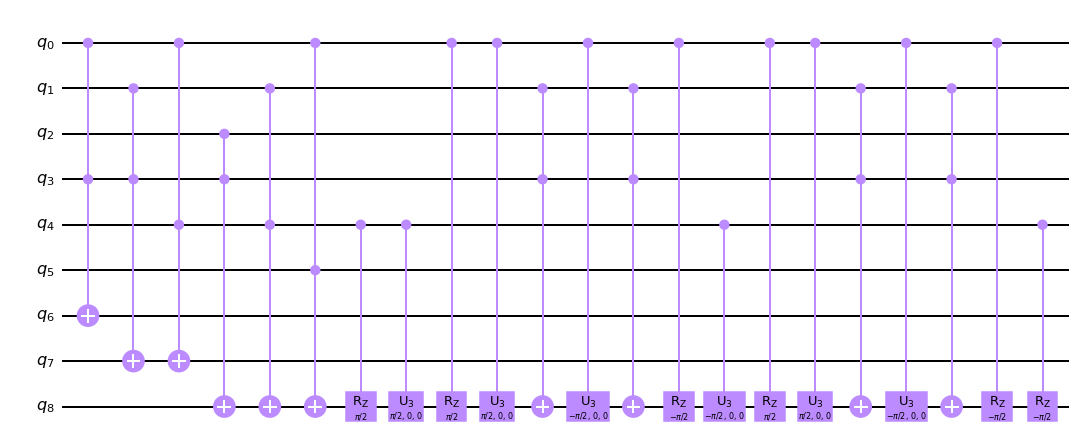

In [9]:
def create_QMultiplication(input_bit_size, double_output = False, enable_carry = True):
  output_size = input_bit_size*2 if double_output else input_bit_size

  #Input1, Input2, Output
  Mul_circ = QuantumCircuit(input_bit_size * 2 + output_size, name='Mul')

  OldMap = []

  for i in range(output_size):

    #Store all the ANDs for calculations (i.e., Can store multi bit AND)
    Map = []

    #No carry multiply (i.e, Just AND)
    h = i+1 - input_bit_size
    h = h if h > 0 else 0
    print(h)
    for j in range(h, i+1-h):
      Map.append([i-j, j+input_bit_size])

    #Carrys
    #Warning!: Will increase size exponentialy if enabled
    if enable_carry:
     for k in range(len(OldMap)-1):
       Map.append([*OldMap[k], *OldMap[k+1]])

    #Applying the ANDs in Map to Output in circuit
    for AND in Map:
      Mul_circ.cnx(*AND, i+input_bit_size*2)

    #print(Map)
    OldMap = Map

  return Mul_circ

transpile(create_QMultiplication(3), None, None).draw(output='mpl')

0
0
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  if sys.path[0] == '':


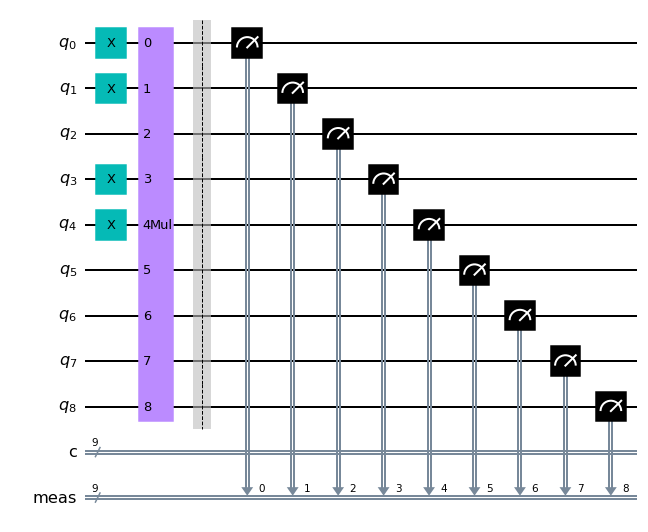

In [10]:
qubits = 9

# Bell state circuit where iSWAPS should be inserted at barrier locations
main_circ = QuantumCircuit(qubits, qubits, name='bell')
main_circ.x(0)
main_circ.x(1)
main_circ.x(3)
main_circ.x(4)
main_circ.append(create_QMultiplication(int(qubits/3)), range(qubits))

#Measure all
main_circ.measure_all()
main_circ.draw(output='mpl')

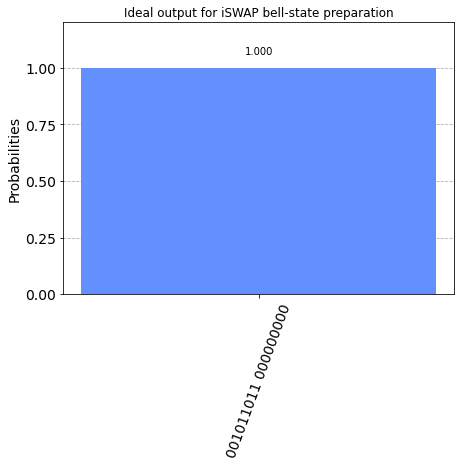

In [11]:
# Create ideal simulator backend and transpile circuit
sim_ideal = AerSimulator()
tmain_circ = transpile(main_circ, sim_ideal)

ideal_result = sim_ideal.run(tmain_circ).result()
ideal_counts = ideal_result.get_counts(0)
plot_histogram(ideal_counts,
               title='Ideal output for iSWAP bell-state preparation')